In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import cifar10

C:\Users\akshu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\akshu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\akshu\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\akshu\AppData\Local\Conti

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 177s 1us/step


In [3]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [4]:
train_filter = np.isin(y_train, [3, 5])
test_filter = np.isin(y_test, [3, 5])

In [5]:
X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

In [6]:
X_train = X_train.reshape(-1, 32*32*3).astype('float32') / 255.0
X_test = X_test.reshape(-1, 32*32*3).astype('float32') / 255.0

In [7]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [8]:
svm = SVC(kernel='linear', random_state=42)

In [9]:
print("X_train shape:", X_train.shape)

X_train shape: (10000, 3072)


In [10]:
X_train_small = X_train[:200]
y_train_small = y_train[:200]

print("Training smaller SVM...")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_small, y_train_small)
print("Training complete.")

Training smaller SVM...
Training complete.


In [11]:
svm = SVC(kernel='linear', random_state=42, verbose=True)

In [12]:
from sklearn.svm import SVC

# Use only the first 300 samples to make it run faster
X_small = X_train[:300]
y_small = y_train[:300]

print("Training SVM on 300 samples...")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_small, y_small)
print("✅ Training complete.")

Training SVM on 300 samples...
✅ Training complete.


In [13]:
from sklearn.svm import LinearSVC

print("Training fast LinearSVC...")
svm = LinearSVC(max_iter=10000, random_state=42)
svm.fit(X_train, y_train)

print("Predicting...")
y_pred = svm.predict(X_test)
print("✅ Prediction complete.")

Training fast LinearSVC...
Predicting...
✅ Prediction complete.


C:\Users\akshu\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [14]:
target_names = ['cat', 'dog']
print("\n🎯 Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


🎯 Classification Report:

              precision    recall  f1-score   support

         cat       0.57      0.56      0.57      1000
         dog       0.57      0.57      0.57      1000

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000



In [15]:
cat_indices = np.where(y_test == 0)[0]
dog_indices = np.where(y_test == 1)[0]

In [16]:
cat_samples = np.random.choice(cat_indices, 2, replace=False)
dog_samples = np.random.choice(dog_indices, 2, replace=False)

In [17]:
selected_indices = np.concatenate([cat_samples, dog_samples])

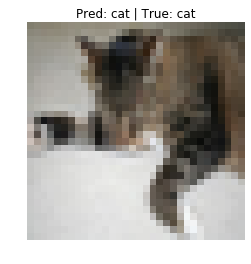

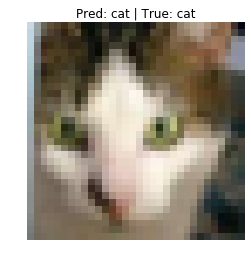

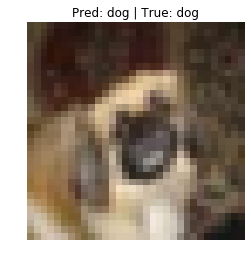

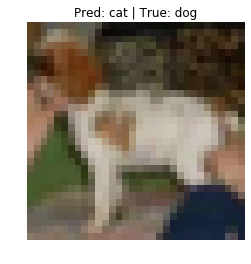

In [18]:
for i in selected_indices:
    plt.imshow(X_test[i].reshape(32, 32, 3))
    plt.title(f"Pred: {target_names[y_pred[i]]} | True: {target_names[y_test[i]]}")
    plt.axis('off')
    plt.show()